In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
import matplotlib.pyplot as plt
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor


In [3]:
from google.colab import files

uploaded = files.upload()

Saving house_buy.csv to house_buy.csv


In [4]:
property1 = pd.read_csv('house_buy.csv')

In [5]:
# Displaying the first 5 records

property1.head()

,Unnamed: 0,house-types,location,bedrooms,bathrooms,toilets,price,rent / sale
0,0,DETACHED DUPLEX,Lekki,4,4,5,"90,000,000",SALE
1,1,MINI FLAT,Lekki,1,1,2,"25,000,000",SALE
2,2,TERRACED DUPLEX,Lekki,4,4,5,"55,000,000",SALE
3,3,TERRACED DUPLEX,Lekki,4,4,5,"45,000,000",SALE
4,4,TERRACED DUPLEX,Lekki,2,2,3,"35,000,000",SALE


In [6]:
property1.shape

(11000, 8)

In [7]:
property1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   11000 non-null  int64 
 1   house-types  11000 non-null  object
 2   location     11000 non-null  object
 3   bedrooms     11000 non-null  object
 4   bathrooms    11000 non-null  object
 5   toilets      11000 non-null  object
 6   price        11000 non-null  object
 7   rent / sale  11000 non-null  object
dtypes: int64(1), object(7)
memory usage: 687.6+ KB


In [8]:
property1.columns

Index(['Unnamed: 0', 'house-types', 'location', 'bedrooms', 'bathrooms',
       'toilets', 'price', 'rent / sale'],
      dtype='object')


```
```
# <h2> Cleaning The Dataset </h2>``
<h3> - Getting unique values per attribute</h3>
```

In [9]:
print('House Types: ', property1['house-types'].unique(), '\n')
print('---------------------------------------------')
print('Location: ', property1['location'].unique(), '\n')
print('---------------------------------------------')
print('Number of Bedrooms: ', property1['bedrooms'].unique(), '\n')
print('---------------------------------------------')
print('Number of Bathrooms: ', property1['bathrooms'].unique(), '\n')
print('---------------------------------------------')
print('Number of Toilets: ', property1['toilets'].unique(), '\n')
print('---------------------------------------------')


House Types:  ['DETACHED DUPLEX' 'MINI FLAT' 'TERRACED DUPLEX' 'SEMI DETACHED'
 'BLOCKS OF' 'MASSIONETTE HOUSE' 'DETACHED BUNGALOW' 'HOUSE FOR'
 'FOR RENT' 'TERRACED BUNGALOW' 'FLATS HOUSE' 'DUPLEX HOUSE' 'SALE'
 'FLAT ' 'SELF CONTAIN' 'FOR SALE' 'BUNGALOW HOUSE'] 

---------------------------------------------
Location:  ['Lekki' 'Ikoyi' 'Isolo' 'VGCLekki' 'AjahAjah' 'LafiajiLekki'
 'TollgateLekki' 'Road.Lekki' 'Drive.Lekki' 'Ajah' 'Ilupeju' 'gateLekki'
 'MegamoundLekki' 'Island' 'OrchidLekki' '...Ajah' 'lekkiLekki'
 'ChevronLekki' 'Ikeja' 'ajahAjah' 'LekkiLekki' 'IkotaLekki' 'Ojodu'
 'AxisLekki' 'CityAjah' 'roadLekki' '2' 'EstateLekki' 'Gbagada'
 'RoadLekki' 'Maryland' 'Surulere' 'orchidLekki' 'IkoyiIkoyi' 'estateAjah'
 'OsapaLekki' 'estateLekki' 'EstateAjah' 'estateIkoyi' 'SouthwestIkoyi'
 'Ogba' '12Ketu' 'Egba' 'Yaba' 'Sangotedo' 'Odofin' 'wayIsolo' 'Ejigbo'
 'Epe' 'Lagos.Ikeja' 'isoloIsolo' 'AlapareKetu' 'LagosIkoyi' 'okearoIju'
 'ISHAGAIju' 'Iju' 'roadIsolo' 'Ipaja' 'estateIju' '

<h3> - Getting Value Counts Per Attribute </h3>

In [10]:
print('House Types: ', property1['house-types'].value_counts(), '\n')
print('---------------------------------------------')
print('Location: ', property1['location'].value_counts(), '\n')
print('---------------------------------------------')
print('Number of Bedrooms: ', property1['bedrooms'].value_counts(), '\n')
print('---------------------------------------------')
print('Number of Bathrooms: ', property1['toilets'].value_counts(), '\n')
print('---------------------------------------------')
print('Number of Toilets: ', property1['price'].value_counts(), '\n')
print('---------------------------------------------')
print('Status: ', property1['rent / sale'].value_counts(), '\n')

House Types:  DETACHED DUPLEX      3686
SEMI DETACHED        2001
TERRACED DUPLEX      1557
HOUSE FOR            1430
BLOCKS OF             680
FLATS HOUSE           446
DETACHED BUNGALOW     344
SALE                  339
DUPLEX HOUSE          202
MINI FLAT              93
MASSIONETTE HOUSE      90
TERRACED BUNGALOW      32
FOR RENT               32
FLAT                   28
SELF CONTAIN           25
FOR SALE                8
BUNGALOW HOUSE          7
Name: house-types, dtype: int64 

---------------------------------------------
Location:  Lekki          5022
Ikoyi           962
Ajah            829
Ojodu           389
Ikeja           378
               ... 
LEKKI.Lekki       1
12Ketu            1
ikateAjah         1
rdOgba            1
Lekki.Lekki       1
Name: location, Length: 399, dtype: int64 

---------------------------------------------
Number of Bedrooms:  4       4106
5       3119
beds    1139
3       1063
0        708
2        282
6        275
1         93
10        80
7    

In [11]:
#creating a function for the 'house type' attribute that converts all wrongly spelt features to NaN values

def type(x):
    
    if 'FLAT' in x:
        return 'Flat'
    
    elif 'TERRACED DUPLEX' in x:
        return 'Terraced Duplex'
    
    elif 'MINI FLAT' in x:
        return 'Mini Flat'
    
    elif 'DETACHED DUPLEX' in x:
        return 'Detached Duplex'
    
    elif 'SEMI DETACHED' in x:
        return 'Semi Detached Duplex'
    
    elif 'BLOCKS OF' in x:
        return 'Blocks of Flats'
    
    elif 'HOUSE FOR' in x:
        return 'Duplex'
    
    elif 'COMMERCIAL PROPERTY' in x:
        return 'Commercial Property'
    
    elif 'APARTMENT FOR' in x:
        return 'Flat'
    
    elif 'PROPERTY FOR' in x:
        return 'Commercial Property'
    
    elif 'SHARED APARTMENT' in x:
        return 'Shared Apartment'
    
    elif 'PENTHOUSE FLAT' in x:
        return 'Penthouse Flat'
    
    elif 'SELF CONTAIN' in x:
        return 'Self Contain'
    
    elif 'OFFICE SPACE' in x:
        return 'Office Space'
    
    elif 'LAND FOR' in x:
        return 'Land'
    
    elif 'MASSIONETTE HOUSE' in x:
        return 'Massionette House'
    
    elif 'FLATS HOUSE' in x:
        return 'Flats'
    
    elif 'DUPLEX HOUSE' in x:
        return 'Duplex'
    
    elif 'DETACHED BUNGALOW ' in x:
        return 'Detached Bungalow'
    
    elif 'A MALL' in x:
        return 'Shop(In Mall)'
    
    elif 'LAND LAND' in x:
        return 'Land'
    
    elif 'BOYS QUARTERS' in x:
        return 'Boys Quarters'
    
    elif 'HOTELGUEST HOUSE' in x:
        return 'Hotel Guest House'
    
    elif 'STUDIO APARTMENT' in x:
        return 'Studio Apartment'
        
    elif 'CO WORKING' in x:
        return 'Co Working Space'
    
    elif 'BLOCK OF' in x:
        return 'Blocks of Flats'
    
    elif 'WORKING SPACE' in x:
        return 'Co Working Space'
    
    elif 'SPACE FOR' in x:
        return 'Office Space'
    
    elif 'SHOP COMMERCIAL' in x:
        return 'Shop'
    
    elif 'SHOP IN' in x:
        return 'Shop(In Mall)'
    
    elif ' APARTMENT' in x:
        return 'Flat'
    
    elif 'TERRACED BUNGALOW' in x:
        return 'Terraced Bungalow'
    
    elif 'DUPLEX FOR' in x:
        return 'Duplex'
    
    elif 'FACTORY COMMERCIAL' in x:
        return 'Factory'
      
    elif 'FOR RENT' in x:
        return 'Flat'
      
    elif 'RENT' in x:
        return 'Flat'
    
    elif 'SHOW ROOM' in x:
        return 'Show Room'
    
    elif 'TERRACE FOR' in x:
        return 'Terraced Duplex'
    
    elif 'CONFERENCE ROOM' in x:
        return 'Conference Room'
    
    elif 'EVENT CENTRE' in x:
        return 'Event Centre'
    
    else:
        return 'NaN'
    
   

In [12]:
#creating a new attribute for "house types"

property1["house-type"] = property1["house-types"].apply(type)

property1.head()

,Unnamed: 0,house-types,location,bedrooms,bathrooms,toilets,price,rent / sale,house-type
0,0,DETACHED DUPLEX,Lekki,4,4,5,"90,000,000",SALE,Detached Duplex
1,1,MINI FLAT,Lekki,1,1,2,"25,000,000",SALE,Flat
2,2,TERRACED DUPLEX,Lekki,4,4,5,"55,000,000",SALE,Terraced Duplex
3,3,TERRACED DUPLEX,Lekki,4,4,5,"45,000,000",SALE,Terraced Duplex
4,4,TERRACED DUPLEX,Lekki,2,2,3,"35,000,000",SALE,Terraced Duplex


In [14]:
#confirming the features and attributes are rightly generated

property1["house-type"].value_counts()

Detached Duplex         3686
Semi Detached Duplex    2001
Duplex                  1632
Terraced Duplex         1557
NaN                      698
Blocks of Flats          680
Flat                     599
Massionette House         90
Terraced Bungalow         32
Self Contain              25
Name: house-type, dtype: int64

In [15]:
#creating a function for the 'location' attribute that converts all wrongly spelt features to NaN values

def locations(x):
    
    if 'Island' in x:
        return 'Victoria Island'
    
    elif 'Ikoyi' in x:
        return 'Ikoyi'
    
    elif 'Ikeja' in x:
        return 'Ikeja'
    
    elif 'Lekki' in x:
        return 'Lekki'
    
    elif 'Ojodu' in x:
        return 'Ojodu'
    
    elif 'Isolo' in x:
        return 'Isolo'
    
    elif 'Ikosi' in x:
        return 'Ikosi'
    
    elif 'RoadIkoyi' in x:
        return 'Ikoyi'
    
    elif 'Maryland' in x:
        return 'Maryland'
    
    elif 'Ikorodu' in x:
        return 'Ikorodu'
    
    elif 'Right.Lekki' in x:
        return 'Lekki'
    
    elif 'gateLekki' in x:
        return 'Lekki'
    
    elif 'Ilupeju' in x:
        return 'Ilupeju'
    
    elif 'Gbagada' in x:
        return 'Gbagada'
    
    elif 'RouteLekki' in x:
        return 'Lekki'
    
    elif 'Ajah' in x:
        return 'Ajah'
    
    elif 'TollgateLekki' in x:
        return 'Lekki'
    
    elif 'Surulere' in x:
        return 'Surulere'
    
    elif 'Mushin ' in x:
        return 'Mushin'
    
    elif 'roadIkoyi' in x:
        return 'Ikoyi'
    
    elif 'LagosLekki' in x:
        return 'Lekki'
    
    elif 'Ipaja' in x:
        return 'Ipaja'
    
    elif 'Yaba' in x:
        return 'Yaba'
    
    elif 'Sangotedo' in x:
        return 'Sangotedo'
        
    elif 'GRAIkeja' in x:
        return 'Ikeja'
    
    elif 'Ogudu' in x:
        return 'Ogudu'
    
    elif 'roadLekki' in x:
        return 'Lekki'
    
    elif 'Okota' in x:
        return 'Okota'
    
    elif 'Egba' in x:
        return 'Egba'
    
    elif 'Odofin' in x:
        return 'Odofin'
    
    elif 'RoadLekki' in x:
        return 'Lekki'
    
    elif 'MarylandMaryland' in x:
        return 'Maryland'
    
    elif 'Ejigbo' in x:
        return 'Ejigbo'
    
    elif 'Oshodi' in x:
        return 'Oshodi'
    
    elif 'Ogba' in x:
        return 'Ogba'
    
    elif 'Shomolu' in x:
        return 'Shomolu'
    
    elif 'Alimosho' in x:
        return 'Alimosho'
    
    elif 'Lagos.Yaba' in x:
        return 'Yaba'
    
    elif 'Agege' in x:
        return 'Agege'
    
    elif 'OGUDUOgudu' in x:
        return 'Ogudu'
    
    elif 'IkoyiIkoyi' in x:
        return 'Ikoyi'
    
    elif 'orchidLekki' in x:
        return 'Lekki'
    
    elif 'elegushiLekki' in x:
        return 'Lekki'
    
    elif 'mallSangotedo' in x:
        return 'Sangotedo'
    
    elif 'lekkiLekki' in x:
        return 'Lekki'
    
    elif 'DriveLekki' in x:
        return 'Lekki'
    
    elif 'Igando' in x:
        return 'Igando'
    
    elif 'Road.Ikoyi' in x:
        return 'Ikoyi'
    
    elif 'RightLekki' in x:
        return 'Lekki'
    
    elif 'AxisLekki' in x:
        return 'Lekki'
    
    elif 'Camp' in x:
        return 'Camp'
    
    elif 'OLekki' in x:
        return 'Lekki'
    
    elif 'OrchidLekki' in x:
        return 'Lekki'
    
    elif 'IkateLekki' in x:
        return 'Lekki'
    
    elif '...Lekki' in x:
        return 'Lekki'
    
    elif 'estateLekki' in x:
        return 'Lekki'
    
    elif 'AnthonyMaryland' in x:
        return 'Maryland'
    
    elif 'estateAjah ' in x:
        return 'Ajah'
    
    elif '...Ikoyi' in x:
        return 'Ikoyi'
    
    elif '-Ikeja' in x:
        return 'Ikeja'
    
    elif 'streetIkeja' in x:
        return 'Ikeja'
    
    elif 'Apapa' in x:
        return 'Apapa'
    
    elif 'Ojota' in x:
        return 'Ojota'
    
    elif 'IPAJAIpaja' in x:
        return 'Ipaja'
    
    elif 'StreetGbagada' in x:
        return 'Gbagada'
    
    elif 'ChevronLekki' in x:
        return 'Lekki'
    
    elif 'GTBankGbagada' in x:
        return 'Gbagada'
    
    elif 'LondonLekki' in x:
        return 'Lekki'
    
    elif 'AreaOjodu' in x:
        return 'Ojodu'
    
    elif 'LekkiLekki' in x:
        return 'Lekki'
    
    elif 'Idimu' in x:
        return 'Idimu'
    
    elif 'wayIsolo' in x:
        return 'Isolo'
    
    elif 'VGCLekki' in x:
        return 'Lekki'
    
    elif 'courtLekki' in x:
        return 'Lekki'
    
    elif 'streetSurulere' in x:
        return 'Surulere'
    
    elif 'kayIkorodu' in x:
        return 'Ikorodu'
    
    elif 'road.Ajah' in x:
        return 'Ajah'
    
    elif 'roadIlupeju' in x:
        return 'Ilupeju'
    
    elif 'roadKetu' in x:
        return 'Ketu'
    
    elif 'OneSangotedo' in x:
        return 'Sangotedo'
    
    elif 'ObawoleIju' in x:
        return 'Iju'
    
    elif 'HotelOgba' in x:
        return 'Ogba'
    
    elif 'paradiseLekki' in x:
        return 'Lekki'
    
    elif '2Ajah' in x:
        return 'Ajah'
    
    elif 'Gbagada.Gbagada' in x:
        return 'Gbagada'
    
    elif '101233Ikoyi' in x:
        return 'Ikoyi'
    
    elif 'SchoolAjah' in x:
        return 'Ajah'
    
    elif 'SurulereSurulere' in x:
        return 'Surulere'
    
    elif 'AKERELESurulere' in x:
        return 'Surulere'
    
    elif 'EstateLekki' in x:
        return 'Lekki'
    
    elif 'Abule-EgbaAgege' in x:
        return 'Agege'
    
    elif 'OgbaIju' in x:
        return 'Iju'
    
    elif 'AgungiLekki' in x:
        return 'Lekki'
    
    elif 'AlapereKetu' in x:
        return 'Ketu'
    
    elif '1Lekki' in x:
        return 'Lekki'
    
    elif 'shomoluShomolu' in x:
        return 'Shomolu'
    
    elif '...Ogudu' in x:
        return 'Ogudu'
    
    elif '(LBS)Ajah' in x:
        return 'Ajah'
    
    elif 'EstateOkota' in x:
        return 'Okota'
    
    elif 'EstateIkeja' in x:
        return 'Ikeja'
    
    elif 'AptechAjah' in x:
        return 'Ajah'
    
    elif 'ilupejuYaba' in x:
        return 'Yaba'
    
    elif 'Badagry' in x:
        return 'Badagry'
    
    elif 'areaIsolo' in x:
        return 'Isolo'
    
    elif 'RoadAjah' in x:
        return 'Ajah'
    
    elif '...Ogba' in x:
        return 'Ogba'
    
    elif 'IlupejuIlupeju' in x:
        return 'Ilupeju'
    
    elif 'OnikeYaba' in x:
        return 'Yaba'
    
    elif 'IkejaMaryland' in x:
        return 'Maryland'
    
    elif 'areaYaba' in x:
        return 'Yaba'
    
    elif 'ijeshaYaba' in x:
        return 'Yaba'
    
    elif '...Ipaja' in x:
        return 'Ipaja'
    
    elif 'areaEjigbo' in x:
        return 'Ejigbo'
    
    elif 'Yaba.Yaba' in x:
        return 'Yaba'
    
    elif 'estateIsolo' in x:
        return 'Isolo'
    
    elif '-----Alimosho' in x:
        return 'Alimosho'
    
    elif 'YabaYaba' in x:
        return 'Yaba'
    
    elif 'isoloIsolo' in x:
        return 'Isolo'
    
    elif 'bustopIsolo' in x:
        return 'Isolo'
    
    elif 'MainlandIsolo' in x:
        return 'Isolo'
    
    elif '-Gbagada' in x:
        return 'Gbagada'
    
    elif 'DriveIkoyi' in x:
        return 'Ikoyi'
    
    elif 'G.R.Yaba' in x:
        return 'Yaba'
    
    elif '2Ikeja' in x:
        return 'Ikeja'
    
    elif '1Ikeja' in x:
        return 'Ikeja'
    
    elif 'Avenue' in x:
        return 'Ikoyi'
    
    elif 'Oniru' in x:
        return 'Victoria Island'
    
    elif 'isheriOjodu' in x:
        return 'Ojodu'
    
    elif 'schoolOjodu' in x:
        return 'Ojodu'
    
    elif 'OniriLekki' in x:
        return 'Lekki'
    
    elif '-Yaba' in x:
        return 'Yaba'
    
    elif 'StreetIkoyi' in x:
        return 'Ikoyi'
    
    elif 'EstateIkoyi' in x:
        return 'Ikoyi'
    
    elif 'Omorinre' in x:
        return 'Lekki'
    
    elif 'Babs' in x:
        return 'Surulere'
    
    elif 'Alaka' in x:
        return 'Surulere'
    
    elif 'Bourdillon' in x:
        return 'Ikoyi'
    
    elif 'GraIkeka' in x:
        return 'Ikeja'
    
    elif 'EstateGbagada' in x:
        return 'Gbagada'
    
    elif 'ThomasSurulere' in x:
        return 'Surulere'
    
    elif 'ShangishaIkeja' in x:
        return 'Ikeja'
    
    elif 'BajulaiyeShomolu' in x:
        return 'Shomolu'
    
    elif 'IdadoLekki' in x:
        return 'Lekki'
    
    elif 'Iju' in x:
        return 'Iju'
    
    elif 'Ketu' in x:
        return 'Ketu'
    
    elif 'IteleIpaja' in x:
        return 'Ipaja'
    
    elif 'ShomoluShomolu' in x:
        return 'Shomolu'
    
    elif 'ketuKetu' in x:
        return 'Ketu'
    
    elif 'PALACEIsolo' in x:
        return 'Isolo'
    
    elif 'CloseIkeja' in x:
        return 'Ikeja'
    
    elif '(Lekki)Lekki' in x:
        return 'Lekki'
    
    elif 'EstateOjodu' in x:
        return 'Ojodu'
    
    elif 'bustopIju' in x:
        return 'Iju'
    
    elif 'EstateApapa' in x:
        return 'Apapa'
    
    elif 'GardenLekki' in x:
        return 'Lekki'
    
    elif 'EstateIsolo' in x:
        return 'Isolo'
    
    elif 'mosanIpaja' in x:
        return 'Ipaja'
    
    elif 'wayYaba' in x:
        return 'Yaba'
    
    elif 'EstateOgba' in x:
        return 'Ogba'
    
    elif 'Ojo' in x:
        return 'Ojo'
    
    elif 'MShomolu' in x:
        return 'Shomolu'
    
    elif 'CrescentApapa' in x:
        return 'Apapa'
    
    elif 'roadOgba' in x:
        return 'Ogba'
    
    elif 'WayIkoyi' in x:
        return 'Ikoyi'
    
    elif '...Gbagada' in x:
        return 'Gbagada'
    
    elif 'estateIlupeju' in x:
        return 'Ilupeju'
    
    elif 'OlogoloLekki' in x:
        return 'Lekki'
    
    elif 'wayLekki' in x:
        return 'Lekki'
    
    elif 'CountyLekki' in x:
        return 'Lekki'
    
    elif 'WayLekki' in x:
        return 'Lekki'
    
    elif 'EleganzaLekki' in x:
        return 'Lekki'
    
    elif 'ElegushiLekki' in x:
        return 'Lekki'
    
    elif 'AjahLekki' in x:
        return 'Ajah'
    
    elif 'StreetIkeja' in x:
        return 'Ikeja'
    
    elif 'AmusaLekki' in x:
        return 'Lekki'
    
    elif 'chevronLekki' in x:
        return 'Lekki'
    
    elif 'DriveSurulere' in x:
        return 'Surulere'
    
    elif 'OsborneIkoyi' in x:
        return 'Ikoyi'
    
    elif '.Ikoyi' in x:
        return 'Ikoyi'
    
    elif 'rdIkoyi' in x:
        return 'Ikoyi'
    
    elif 'gloverIkoyi' in x:
        return 'Ikoyi'
    
    elif 'avenueIkoyi' in x:
        return 'Ikoyi'
    
    elif 'AlexandraIkoyi' in x:
        return 'Ikoyi'
    
    elif 'AlexanderIkoyi' in x:
        return 'Ikoyi'
    
    elif 'estateIkoyi' in x:
        return 'Ikoyi'
    
    elif 'WaterfrontIkoyi' in x:
        return 'Ikoyi'
    
    elif 'highbrowIkoyi' in x:
        return 'Ikoyi'
    
    elif 'RDIkoyi' in x:
        return 'Ikoyi'
    
    elif 'streetLekki' in x:
        return 'Lekki'
    
    elif 'ROADIkoyi' in x:
        return 'Ikoyi'
    
    elif '...Maryland' in x:
        return 'Maryland'
    
    elif 'LagosIkoyi' in x:
        return 'Ikoyi'
    
    elif 'IfakoGbagada' in x:
        return 'Gbagada'
    
    elif 'boyGbagada' in x:
        return 'Gbagada'
    
    elif 'LagosIlupeju' in x:
        return 'Ilupeju'
    
    elif 'AdemolaIkoyi' in x:
        return 'Ikoyi'
    
    elif 'rdGbagada' in x:
        return 'Gbagada'
    
    elif 'ojoduOjodu' in x:
        return 'Ojodu'
    
    elif 'EstateAjah' in x:
        return 'Ajah'
    
    elif 'ikejaIkeja' in x:
        return 'Ikeja'
    
    elif '...Shomolu' in x:
        return 'Shomolu'
    
    elif '...Isolo' in x:
        return 'Isolo'
    
    elif '...Ojodu' in x:
        return 'Ojodu'
    
    elif 'homesLekki' in x:
        return 'Lekki'
    
    elif '....Ajah' in x:
        return 'Ajah'
    
    elif 'Orile' in x:
        return 'Agege'
    
    elif 'AdetolaSurulere' in x:
        return 'Surulere'
    
    elif 'AjuwonIju' in x:
        return 'Iju'
    
    elif '...Ajah' in x:
        return 'Ajah'
    
    elif 'ajahAjah' in x:
        return 'Ajah'
    
    elif 'OwodeAjah' in x:
        return 'Ajah'
    
    elif 'streetOgba' in x:
        return 'Ogba'
    
    elif 'IshagaIju' in x:
        return 'Iju'
    
    elif 'gardenAjah' in x:
        return 'Ajah'
    
    elif 'IjuIju' in x:
        return 'Iju'
    
    elif 'estateOkota' in x:
        return 'Okota'
    
    elif 'lacShomolu' in x:
        return 'Shomolu'
    
    elif '-Shomolu' in x:
        return 'Shomolu'
    
    elif 'ogbaIju' in x:
        return 'Ogba'
    
    elif '...Yaba' in x:
        return 'Yaba'
    
    elif 'str.Ojodu' in x:
        return 'Ojodu'
    
    elif 'GRAIkorodu' in x:
        return 'Ikorodu'
    
    elif 'OroSurulere' in x:
        return 'Surulere'
    
    elif 'AdelabuSurulere' in x:
        return 'Surulere'
    
    elif 'obawoleIju' in x:
        return 'Iju'
    
    elif 'StateIju' in x:
        return 'Iju'
    
    elif 'EstateMarylandi' in x:
        return 'Maryland'
    
    elif 'stopLekki' in x:
        return 'Lekki'
    
    elif 'avenueOgba' in x:
        return 'Ogba'
    
    elif 'OGBAOgba' in x:
        return 'Ogba'
    
    elif '-Lekki' in x:
        return 'Lekki'
    
    elif 'AbijoSangotedo' in x:
        return 'Sangotedo'
    
    elif 'AkiodeOjodu' in x:
        return 'Ojodu'
    
    elif 'RoadIju' in x:
        return 'Ogba'
    
    elif 'LEKKILekki' in x:
        return 'Lekki'
    
    elif 'AREA........Ojodu' in x:
        return 'Ojodu'
    
    elif 'roadYaba' in x:
        return 'Yaba'
    
    elif 'RoadShomolu' in x:
        return 'Shomolu'
    
    elif 'Iju-IshagaIju' in x:
        return 'Iju'
    
    elif 'admiraltyLekki' in x:
        return 'Lekki'
    
    elif '2Ojodu' in x:
        return 'Ojodu'
    
    elif 'estateGbagada' in x:
        return 'Gbagada'
    
    elif 'lakShomolu' in x:
        return 'Shomolu'
    
    elif 'sideLEKKI' in x:
        return 'Lekki'
    
    elif 'streetMushin' in x:
        return 'Mushin'
    
    elif 'SalmLekki' in x:
        return 'Lekki'
    
    elif 'B/stopMushin' in x:
        return 'Mushin'
    
    elif 'bankoleSurulere' in x:
        return 'Mushin'
    
    elif 'roadShomolu' in x:
        return 'Mushin'
    
    else:
        return 'NaN'
    
   

In [16]:
#creating a new attribute for "location"

property1["locations"] = property1["location"].apply(locations)

property1.head()

,Unnamed: 0,house-types,location,bedrooms,bathrooms,toilets,price,rent / sale,house-type,locations
0,0,DETACHED DUPLEX,Lekki,4,4,5,"90,000,000",SALE,Detached Duplex,Lekki
1,1,MINI FLAT,Lekki,1,1,2,"25,000,000",SALE,Flat,Lekki
2,2,TERRACED DUPLEX,Lekki,4,4,5,"55,000,000",SALE,Terraced Duplex,Lekki
3,3,TERRACED DUPLEX,Lekki,4,4,5,"45,000,000",SALE,Terraced Duplex,Lekki
4,4,TERRACED DUPLEX,Lekki,2,2,3,"35,000,000",SALE,Terraced Duplex,Lekki


In [17]:
property1["locations"].value_counts()

Lekki              5608
Ikoyi              1077
Ajah                962
Ojodu               411
Ikeja               405
Victoria Island     307
Surulere            256
Ikosi               171
Ikorodu             167
Yaba                148
Gbagada             141
Ipaja               126
Egba                116
Ogba                104
Alimosho             96
Agege                89
Maryland             88
Isolo                83
Igando               82
Shomolu              65
Odofin               63
Ogudu                62
Okota                60
NaN                  52
Sangotedo            44
Iju                  35
Idimu                32
Ejigbo               28
Ilupeju              24
Camp                 23
Ketu                 23
Apapa                21
Ojo                  17
Oshodi               10
Ojota                 3
Badagry               1
Name: locations, dtype: int64

In [18]:
#creating a function that converts all non numerical values to NaN values for the attribute name "bedroom"

def bed(x):
    
    if '1' in x:
        return '1'
    
    elif '2' in x:
        return '2'
    
    elif '3' in x:
        return '3'
    
    elif '4' in x:
        return '4'
    
    elif '5' in x:
        return '5'
    
    elif '6' in x:
        return '6'
    
    elif '7' in x:
        return '7'
    
    elif '8' in x:
        return '8'
    
    elif '9' in x:
        return '9'
    
    elif '10' in x:
        return '10'
    
    else:
        return 'NaN'
    
   

In [19]:
#creating a new attribute that contains all bedroom instances to be numerical and NaN

property1["bedroom"] = property1["bedrooms"].apply(bed)

property1.head()

,Unnamed: 0,house-types,location,bedrooms,bathrooms,toilets,price,rent / sale,house-type,locations,bedroom
0,0,DETACHED DUPLEX,Lekki,4,4,5,"90,000,000",SALE,Detached Duplex,Lekki,4
1,1,MINI FLAT,Lekki,1,1,2,"25,000,000",SALE,Flat,Lekki,1
2,2,TERRACED DUPLEX,Lekki,4,4,5,"55,000,000",SALE,Terraced Duplex,Lekki,4
3,3,TERRACED DUPLEX,Lekki,4,4,5,"45,000,000",SALE,Terraced Duplex,Lekki,4
4,4,TERRACED DUPLEX,Lekki,2,2,3,"35,000,000",SALE,Terraced Duplex,Lekki,2


In [20]:
#creating a function that converts all non numerical values to NaN values for the attribute name "bathroom"

def bath(x):
    
    if '1' in x:
        return '1'
    
    elif '2' in x:
        return '2'
    
    elif '3' in x:
        return '3'
    
    elif '4' in x:
        return '4'
    
    elif '5' in x:
        return '5'
    
    elif '6' in x:
        return '6'
    
    elif '7' in x:
        return '7'
    
    elif '8' in x:
        return '8'
    
    elif '9' in x:
        return '9'
    
    elif '10' in x:
        return '10'
    
    else:
        return 'NaN'
    
   

In [21]:
#creating a new attribute that contains all bathroom instances to be numerical and NaN

property1["bathroom"] = property1["bathrooms"].apply(bath)

property1.head()

,Unnamed: 0,house-types,location,bedrooms,bathrooms,toilets,price,rent / sale,house-type,locations,bedroom,bathroom
0,0,DETACHED DUPLEX,Lekki,4,4,5,"90,000,000",SALE,Detached Duplex,Lekki,4,4
1,1,MINI FLAT,Lekki,1,1,2,"25,000,000",SALE,Flat,Lekki,1,1
2,2,TERRACED DUPLEX,Lekki,4,4,5,"55,000,000",SALE,Terraced Duplex,Lekki,4,4
3,3,TERRACED DUPLEX,Lekki,4,4,5,"45,000,000",SALE,Terraced Duplex,Lekki,4,4
4,4,TERRACED DUPLEX,Lekki,2,2,3,"35,000,000",SALE,Terraced Duplex,Lekki,2,2


In [22]:
#creating a function that converts all non numerical values to NaN values for the attribute name "toilet"

def toil(x):
    
    if '1' in x:
        return '1'
    
    elif '2' in x:
        return '2'
    
    elif '3' in x:
        return '3'
    
    elif '4' in x:
        return '4'
    
    elif '5' in x:
        return '5'
    
    elif '6' in x:
        return '6'
    
    elif '7' in x:
        return '7'
    
    elif '8' in x:
        return '8'
    
    elif '9' in x:
        return '9'
    
    elif '10' in x:
        return '10'
    
    else:
        return 'NaN'
    
   

In [23]:
#creating a new attribute that contains all toilet instances to be numerical and NaN

property1["toilet"] = property1["toilets"].apply(toil)

property1.head()

,Unnamed: 0,house-types,location,bedrooms,bathrooms,toilets,price,rent / sale,house-type,locations,bedroom,bathroom,toilet
0,0,DETACHED DUPLEX,Lekki,4,4,5,"90,000,000",SALE,Detached Duplex,Lekki,4,4,5
1,1,MINI FLAT,Lekki,1,1,2,"25,000,000",SALE,Flat,Lekki,1,1,2
2,2,TERRACED DUPLEX,Lekki,4,4,5,"55,000,000",SALE,Terraced Duplex,Lekki,4,4,5
3,3,TERRACED DUPLEX,Lekki,4,4,5,"45,000,000",SALE,Terraced Duplex,Lekki,4,4,5
4,4,TERRACED DUPLEX,Lekki,2,2,3,"35,000,000",SALE,Terraced Duplex,Lekki,2,2,3


In [24]:
#Dropping the unwanted variables

property1.drop(['Unnamed: 0','house-types', 'location', 'bedrooms', 'bathrooms','toilets', 'rent / sale'], axis=1, inplace=True)

In [25]:
property1.head()

,price,house-type,locations,bedroom,bathroom,toilet
0,"90,000,000",Detached Duplex,Lekki,4,4,5
1,"25,000,000",Flat,Lekki,1,1,2
2,"55,000,000",Terraced Duplex,Lekki,4,4,5
3,"45,000,000",Terraced Duplex,Lekki,4,4,5
4,"35,000,000",Terraced Duplex,Lekki,2,2,3


<h2> Sorting Missing Values </h2>

In [26]:
print('House Types: ', property1['house-type'].unique(), '\n')
print('---------------------------------------------')
print('Location: ', property1['locations'].unique(), '\n')
print('---------------------------------------------')
print('Number of Bedrooms: ', property1['bedroom'].unique(), '\n')
print('---------------------------------------------')
print('Number of Bathrooms: ', property1['bathroom'].unique(), '\n')
print('---------------------------------------------')
print('Number of Toilets: ', property1['toilet'].unique(), '\n')
print('---------------------------------------------')

House Types:  ['Detached Duplex' 'Flat' 'Terraced Duplex' 'Semi Detached Duplex'
 'Blocks of Flats' 'Massionette House' 'NaN' 'Duplex' 'Terraced Bungalow'
 'Self Contain'] 

---------------------------------------------
Location:  ['Lekki' 'Ikoyi' 'Isolo' 'Ajah' 'Ilupeju' 'Victoria Island' 'Ikeja'
 'Ojodu' 'NaN' 'Gbagada' 'Maryland' 'Surulere' 'Ogba' 'Ketu' 'Egba' 'Yaba'
 'Sangotedo' 'Odofin' 'Ejigbo' 'Iju' 'Ipaja' 'Alimosho' 'Ikosi' 'Ikorodu'
 'Igando' 'Camp' 'Ogudu' 'Shomolu' 'Idimu' 'Apapa' 'Okota' 'Agege' 'Ojo'
 'Ojota' 'Oshodi' 'Badagry'] 

---------------------------------------------
Number of Bedrooms:  ['4' '1' '2' '3' '5' '6' '7' 'NaN' '8' '9'] 

---------------------------------------------
Number of Bathrooms:  ['4' '1' '2' '5' '6' '3' 'NaN' '7' '8' '9'] 

---------------------------------------------
Number of Toilets:  ['5' '2' '3' '6' '4' 'NaN' '8' '7' '9' '1'] 

---------------------------------------------


In [27]:
#replacing the missing values ('NaN') with 'np.NaN' and saving with a new name

new_property1 = property1.replace('NaN', np.nan)

In [28]:
print('House Types: ', new_property1['house-type'].unique(), '\n')
print('---------------------------------------------')
print('Location: ', new_property1['locations'].unique(), '\n')
print('---------------------------------------------')
print('Number of Bedrooms: ', new_property1['bedroom'].unique(), '\n')
print('---------------------------------------------')
print('Number of Bathrooms: ', new_property1['bathroom'].unique(), '\n')
print('---------------------------------------------')
print('Number of Toilets: ', new_property1['toilet'].unique(), '\n')
print('---------------------------------------------')


House Types:  ['Detached Duplex' 'Flat' 'Terraced Duplex' 'Semi Detached Duplex'
 'Blocks of Flats' 'Massionette House' nan 'Duplex' 'Terraced Bungalow'
 'Self Contain'] 

---------------------------------------------
Location:  ['Lekki' 'Ikoyi' 'Isolo' 'Ajah' 'Ilupeju' 'Victoria Island' 'Ikeja'
 'Ojodu' nan 'Gbagada' 'Maryland' 'Surulere' 'Ogba' 'Ketu' 'Egba' 'Yaba'
 'Sangotedo' 'Odofin' 'Ejigbo' 'Iju' 'Ipaja' 'Alimosho' 'Ikosi' 'Ikorodu'
 'Igando' 'Camp' 'Ogudu' 'Shomolu' 'Idimu' 'Apapa' 'Okota' 'Agege' 'Ojo'
 'Ojota' 'Oshodi' 'Badagry'] 

---------------------------------------------
Number of Bedrooms:  ['4' '1' '2' '3' '5' '6' '7' nan '8' '9'] 

---------------------------------------------
Number of Bathrooms:  ['4' '1' '2' '5' '6' '3' nan '7' '8' '9'] 

---------------------------------------------
Number of Toilets:  ['5' '2' '3' '6' '4' nan '8' '7' '9' '1'] 

---------------------------------------------


In [29]:
#converting the dataset to a numpy array
new_property1 = new_property1.to_numpy()

In [30]:
clean_property1 = new_property1


In [31]:
clean_property1 = pd.DataFrame(data=clean_property1, columns=property1.columns)

In [32]:
clean_property1.head(50)

,price,house-type,locations,bedroom,bathroom,toilet
0,"90,000,000",Detached Duplex,Lekki,4,4,5
1,"25,000,000",Flat,Lekki,1,1,2
2,"55,000,000",Terraced Duplex,Lekki,4,4,5
3,"45,000,000",Terraced Duplex,Lekki,4,4,5
4,"35,000,000",Terraced Duplex,Lekki,2,2,3
5,"55,000,000",Semi Detached Duplex,Lekki,4,4,5
6,"280,000,000",Terraced Duplex,Ikoyi,3,5,5
7,"55,000,000",Detached Duplex,Isolo,5,5,6
8,"320,000,000",Detached Duplex,Lekki,5,5,5
9,"80,000,000",Semi Detached Duplex,Lekki,4,4,4


In [33]:
clean_property1.to_csv("Cleaned_Rent.csv")

In [34]:
print('House Types: ', clean_property1['house-type'].unique(), '\n')
print('---------------------------------------------')
print('Location: ', clean_property1['locations'].unique(), '\n')
print('---------------------------------------------')
print('Number of Bedrooms: ', clean_property1['bedroom'].unique(), '\n')
print('---------------------------------------------')
print('Number of Bathrooms: ', clean_property1['bathroom'].unique(), '\n')
print('---------------------------------------------')
print('Number of Toilets: ', clean_property1['toilet'].unique(), '\n')
print('---------------------------------------------')


House Types:  ['Detached Duplex' 'Flat' 'Terraced Duplex' 'Semi Detached Duplex'
 'Blocks of Flats' 'Massionette House' nan 'Duplex' 'Terraced Bungalow'
 'Self Contain'] 

---------------------------------------------
Location:  ['Lekki' 'Ikoyi' 'Isolo' 'Ajah' 'Ilupeju' 'Victoria Island' 'Ikeja'
 'Ojodu' nan 'Gbagada' 'Maryland' 'Surulere' 'Ogba' 'Ketu' 'Egba' 'Yaba'
 'Sangotedo' 'Odofin' 'Ejigbo' 'Iju' 'Ipaja' 'Alimosho' 'Ikosi' 'Ikorodu'
 'Igando' 'Camp' 'Ogudu' 'Shomolu' 'Idimu' 'Apapa' 'Okota' 'Agege' 'Ojo'
 'Ojota' 'Oshodi' 'Badagry'] 

---------------------------------------------
Number of Bedrooms:  ['4' '1' '2' '3' '5' '6' '7' nan '8' '9'] 

---------------------------------------------
Number of Bathrooms:  ['4' '1' '2' '5' '6' '3' nan '7' '8' '9'] 

---------------------------------------------
Number of Toilets:  ['5' '2' '3' '6' '4' nan '8' '7' '9' '1'] 

---------------------------------------------


In [35]:
#Knowing the data type of each attribute

clean_property1.dtypes

price         object
house-type    object
locations     object
bedroom       object
bathroom      object
toilet        object
dtype: object


<h2> Exploratory Data Analysis </h2>
```


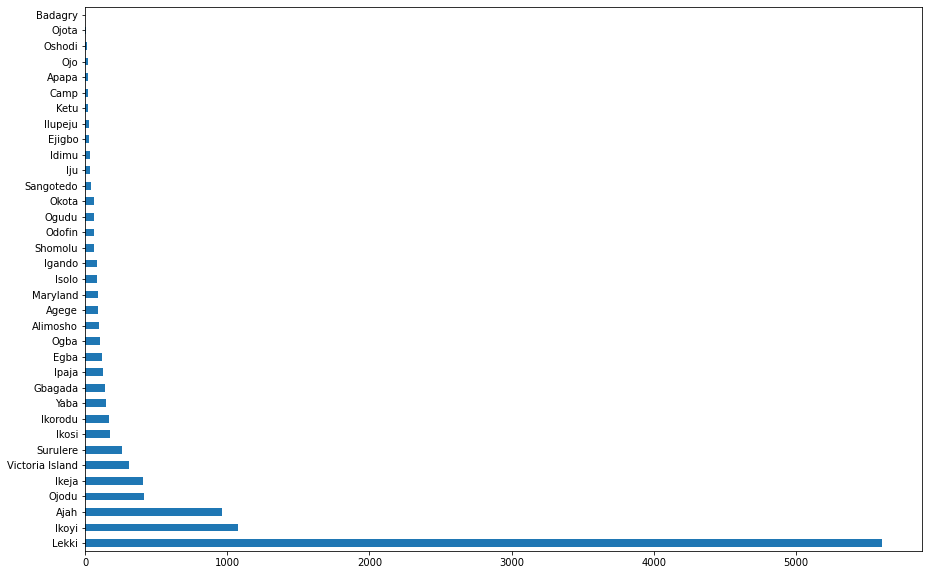

In [36]:
clean_property1['locations'].value_counts().plot(kind='barh', figsize = (15, 10))

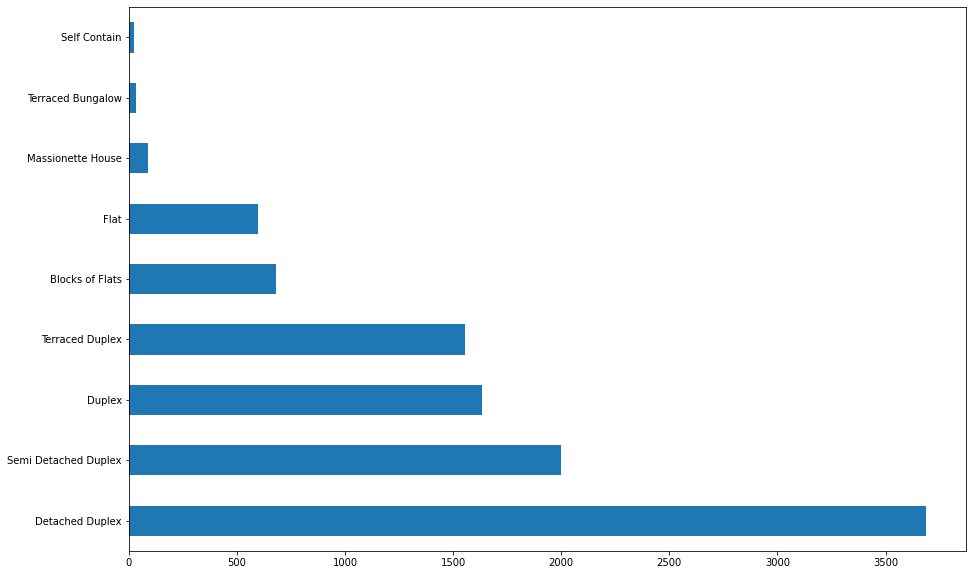

In [41]:
clean_property1['house-type'].value_counts().plot(kind='barh', figsize = (15, 10))

In [42]:
#making a copy of the original data to check for correlation between all attributes

clean_property1_copy = pd.DataFrame(data=clean_property1)

In [43]:
clean_property1_copy

,price,house-type,locations,bedroom,bathroom,toilet
0,"90,000,000",Detached Duplex,Lekki,4,4,5
1,"25,000,000",Flat,Lekki,1,1,2
2,"55,000,000",Terraced Duplex,Lekki,4,4,5
3,"45,000,000",Terraced Duplex,Lekki,4,4,5
4,"35,000,000",Terraced Duplex,Lekki,2,2,3
...,...,...,...,...,...,...
10995,"60,000,000",Semi Detached Duplex,Lekki,4,4,5
10996,"240,000,000",Semi Detached Duplex,Ikoyi,4,4,5
10997,"150,000,000",Duplex,Surulere,NaN,NaN,NaN
10998,"48,000,000",Semi Detached Duplex,Ajah,4,4,5


In [44]:
clean_property1_copy.dtypes

price         object
house-type    object
locations     object
bedroom       object
bathroom      object
toilet        object
dtype: object

In [46]:
clean_property1.to_csv("clean_property1.csv")

In [47]:
clean_property1 = pd.read_csv('clean_property1.csv')